In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

**<font size="6"> Ways to Get Random Normal Value</font>**

- Way 1. np.random.randn

Return a sample (or samples) from the “standard normal” distribution.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

(array([ 3.,  1., 14., 18., 23., 15., 14.,  7.,  2.,  3.]),
 array([-2.44790376, -1.92640074, -1.40489773, -0.88339472, -0.3618917 ,
         0.15961131,  0.68111432,  1.20261733,  1.72412035,  2.24562336,
         2.76712637]),
 <BarContainer object of 10 artists>)

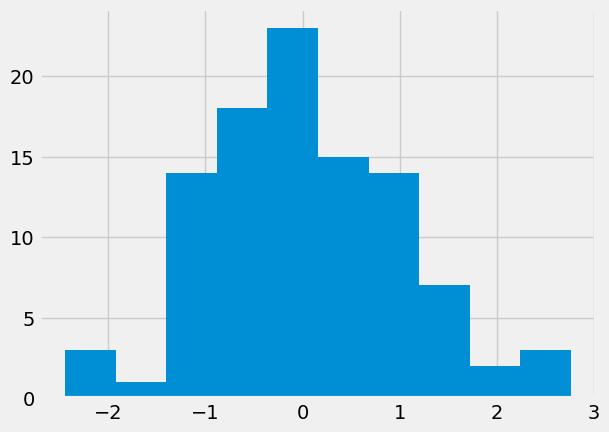

In [17]:
plt.hist(np.random.randn(100))

- Way 2. stats.norm.pdf

The probability density function for norm is:

\begin{equation}
f(x)=\frac{\exp \left(-x^2 / 2\right)}{\sqrt{2 \pi}}
\end{equation}

To shift and/or scale the distribution use the loc and scale parameters. Specifically, **norm.pdf(x, loc, scale)**


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

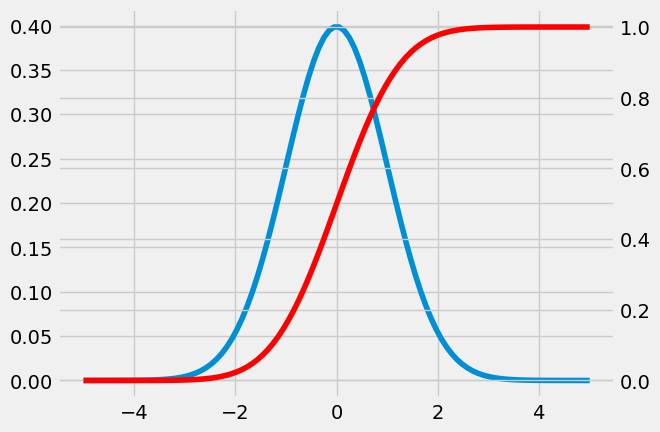

In [10]:
# linspace :  -5 to 5 split in 100 intervals
#

x = np.linspace(-5,5,100)
pdf_normal = stats.norm.pdf(x,0,1)

fig, ax1 = plt.subplots()
ax1.plot(x,pdf_normal)

ax2 = ax1.twinx()
cdf_normal = stats.norm.cdf(x)
ax2.plot(x, cdf_normal, color = 'red')

'norm.ppf' is the inverse of 'norm.cdf'


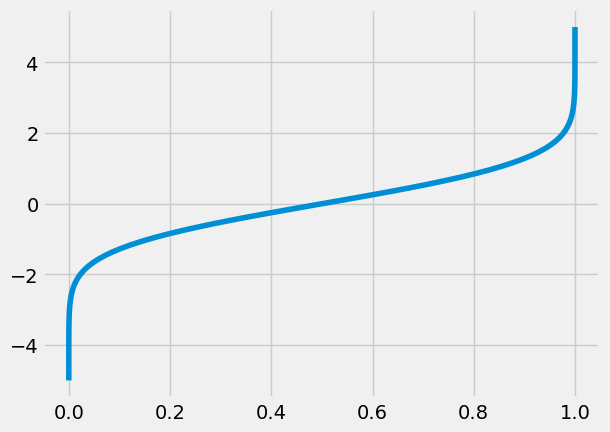

In [11]:
# inverse of cdf of norm
plt.plot(cdf_normal, stats.norm.ppf(cdf_normal, 0, 1))

(array([ 2.,  4.,  7., 12., 20., 15., 15., 12., 10.,  3.]),
 array([-2.26192507, -1.85535184, -1.44877861, -1.04220538, -0.63563215,
        -0.22905892,  0.17751431,  0.58408754,  0.99066077,  1.397234  ,
         1.80380723]),
 <BarContainer object of 10 artists>)

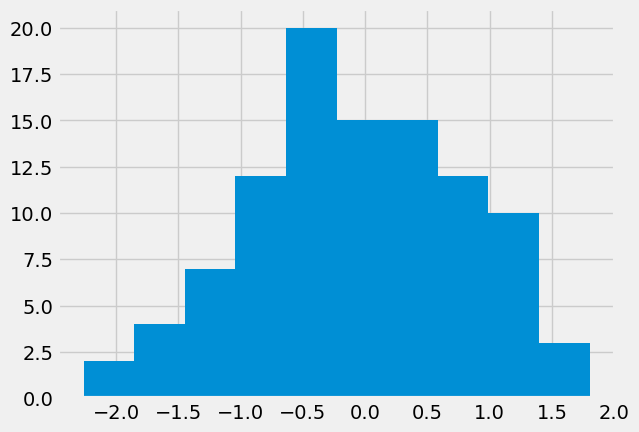

In [31]:
cdf_y = np.random.uniform(0,1,100)
# by the inverse normal, we solve for the x axis of cdf of normal
cdf_x = stats.norm.ppf(cdf_y)
plt.hist(cdf_x)

- Way 3. CLT
Create a r.v. with mean 0 , var 1.
$$
\mathbb{E}\left(\sum^T R A N D()\right)=\frac{T}{2}
$$
Assuming $\alpha$
$$
\begin{gathered}
\operatorname{Var}\left(\alpha \sum^T R A N D()\right)=1 \\
\alpha^2 \sum^T \operatorname{Var}(R A N D())=1
\end{gathered}
$$
$\operatorname{Var}(R A N D())=\frac{1}{12}$, for $(0,1)$ uniformally dist r.v. So, we get, $\sqrt{\frac{12}{T}}$
Thus, we generate the r.v. like the following.
$$
r . v .=\sqrt{\frac{12}{T}}\left(\sum^T R A N D()-\frac{T}{2}\right)
$$

(array([ 6.,  7., 13., 22., 14., 25.,  9.,  3.,  0.,  1.]),
 array([-2.17234864, -1.65562785, -1.13890706, -0.62218627, -0.10546548,
         0.41125531,  0.9279761 ,  1.44469689,  1.96141768,  2.47813847,
         2.99485926]),
 <BarContainer object of 10 artists>)

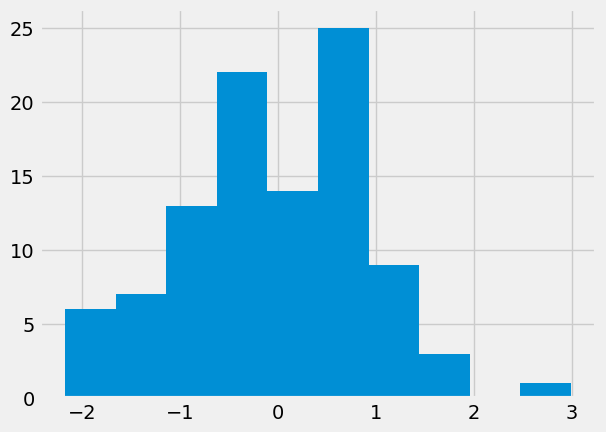

In [33]:
T = 12
x_clt = []
for i in range(100):
    x_clt.append(np.random.uniform(0,1,T).sum() - T/2)

x_clt = np.array(x_clt)/np.sqrt(12/T)
plt.hist(x_clt)

**<font size="6"> Random Walk</font>**

Simulate Random Walk - Euler Maruyama Method
$$
\begin{gathered}
d S=\mu S d t+\sigma S d X \\
S_{i+1}-S_i=S_i\left(\mu S d t+\sigma S \phi t^{1 / 2}\right) \\
S_{i+1}=S_i\left(1+\mu S d t+\sigma S \phi t^{1 / 2}\right)
\end{gathered}
$$

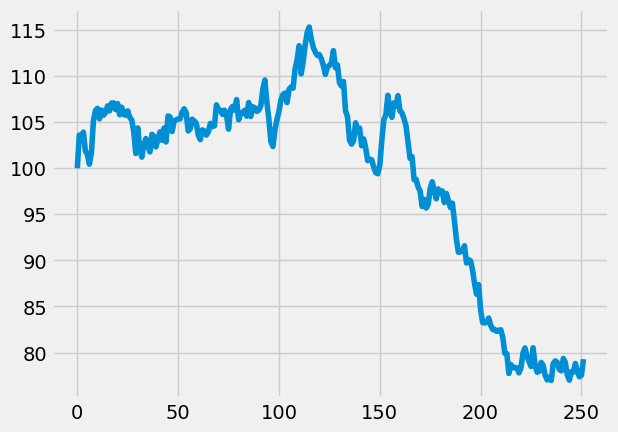

In [28]:
N = 1


mu = 0.0
S0 = 100
S=S0
sigma = 0.2
dt = 1/252
phi = np.random.randn(int(N/dt)-1)

############################
multiplier = 1 + mu*dt + sigma  * phi * np.sqrt(dt)
Sn = S * multiplier.cumprod()
Sn = np.insert(Sn, 0, S0)
plt.plot(Sn)

Vasicek Model -> Ornstein-Unlenbeck Process
$$
\begin{gathered}
d r=\gamma(\overline{(})-r) d t+\sigma d X \\
r_{i+1}=r_i+\gamma\left(\bar{r}-r_i\right) d t+\sigma \phi d t^{1 / 2}
\end{gathered}
$$

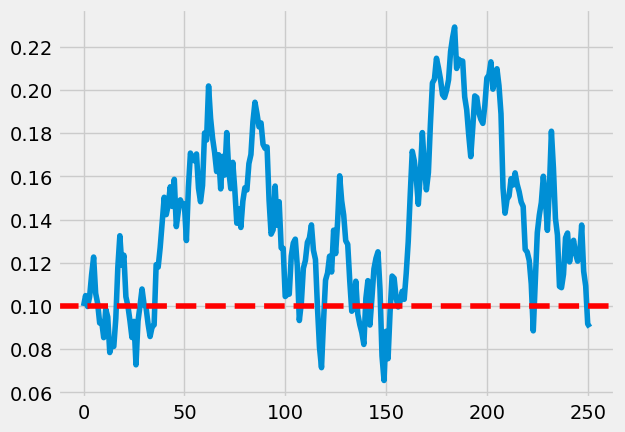

In [25]:
N = 1

rbar = 0.1
r0 = 0.1

gamma = 10 # speed of reverting
sigma = 0.2
dt = 1/252
phi = np.random.randn( int(N/dt) -1)

############################
r = np.zeros(int(N/dt))
r[0] = r0
for i in range(1, int(N/dt)):
    r[i] = r[i-1] + gamma * (rbar - r[i-1])*dt + sigma* np.sqrt(dt) * phi[i-1]
    
plt.plot(r)
plt.axhline(rbar, color = 'r', linestyle = '--')

Correlated R.W.
We mannually create two correlated r.w., with the correlation equal to $\rho$.
$$
\begin{gathered}
\phi_1=\epsilon_1 \\
\phi_2=\rho \epsilon_1+\sqrt{1-\rho^2} \epsilon_2
\end{gathered}
$$

Corr between rho1 and rho2 is:  0.49055922494904347
Corr between Series1 and Series2 is:  0.7926971413119127


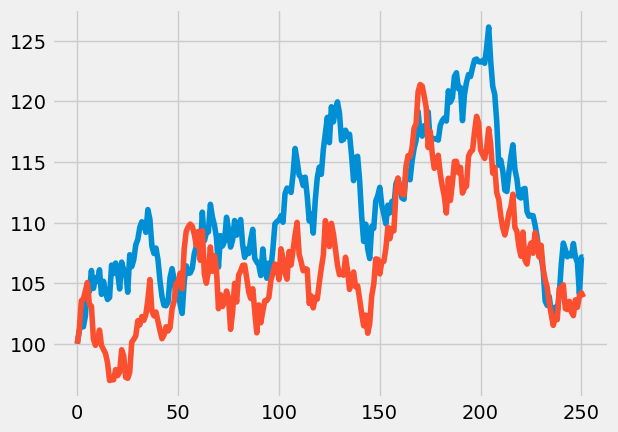

In [30]:
N = 1

mu = 0.1
S0 = 100
sigma = 0.2
dt = 1/252

rho = 0.5
dt = 1/252
phi1 = np.random.randn( int(N/dt) -1)
phi2 = rho * phi1 + np.sqrt( 1 - np.square(rho) ) * np.random.randn( int(N/dt) -1)


############################
def plot_bm(S0, mu, sigma, dt, phi):
    multiplier = 1 + mu*dt + sigma  * phi * np.sqrt(dt)
    Sn = S * multiplier.cumprod()
    Sn = np.insert(Sn, 0, S0)
    plt.plot(Sn)
    return Sn
#############################
Series1 = plot_bm(S0, mu, sigma, dt, phi1)
Series2 = plot_bm(S0, mu, sigma, dt, phi2)

print('Corr between rho1 and rho2 is: ',np.corrcoef(phi1, phi2)[0,1])
print('Corr between Series1 and Series2 is: ',np.corrcoef(Series1, Series2)[0,1])